# IS453-Financial Analytics Lab 1

Compare 4 preassigned mutual funds performance to the S&P index to assess their performance in comparison and determine if the asset managers are “Index hugging” and if they are under/over performing the market.

### 1. Import the relevant libraries
The libraries below are sufficient to complete the lab. Please go ahead to import more libraries if it aids you in answering the questions.

In [1]:
from pandas_datareader import data
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

%matplotlib inline

### 2. Extract 2016-2020 (5y) data for exchange traded funds and SPY as a benchmark for comparison from Yahoo finance.
<br>*Hint: Adjusted Close should always be used when comparing returns.*

-> What are the three funds you are comparing?

    'SECT', 'TTAC', 'RFFC'

In [2]:
tickers = ['SECT', 'TTAC', 'RFFC','SPY']

start_date = '2016-01-01'
end_date = '2020-12-31'

# User pandas_reader.data.DataReader to load data
panel_data = data.DataReader(tickers,'yahoo', start_date, end_date)
adj_close_5y = panel_data['Adj Close']

In [3]:
adj_close_5y.tail()

Symbols,SECT,TTAC,RFFC,SPY
Date,,,,
2020-12-24,34.971001,45.961700,39.046482,369.000000
2020-12-28,35.029999,46.110088,39.305187,372.170013
2020-12-29,34.840000,45.889000,39.018513,371.459991
2020-12-30,34.930000,46.160000,39.207298,371.989990
2020-12-31,35.049999,46.313999,39.305187,373.880005


### 3. Compare the 1-year and 5-year periods

plot and visually compare the prices for 1- and 5-year periods on separate charts. The 1-year should use the most recent year's data.

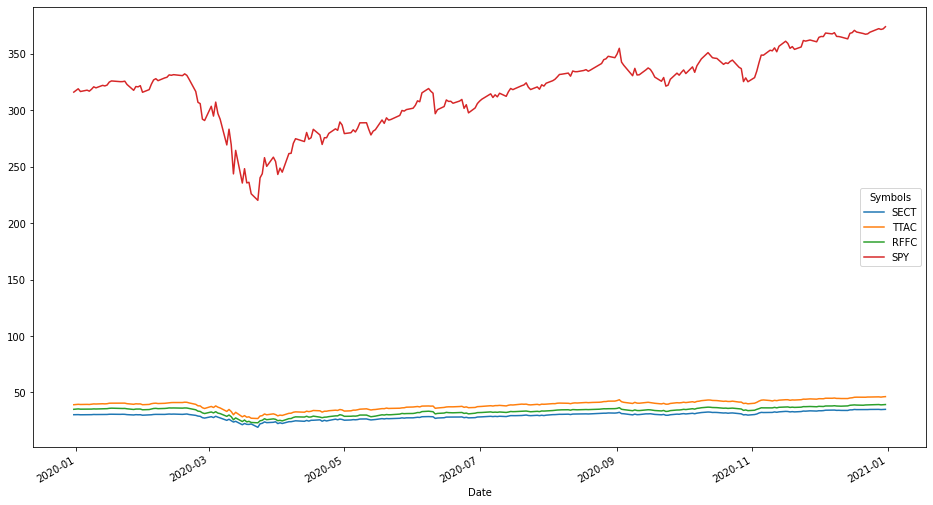

In [4]:
adj_close_1y = adj_close_5y.loc["2019-12-31":"2020-12-31"]
adj_close_1y.plot(figsize=(16,9))

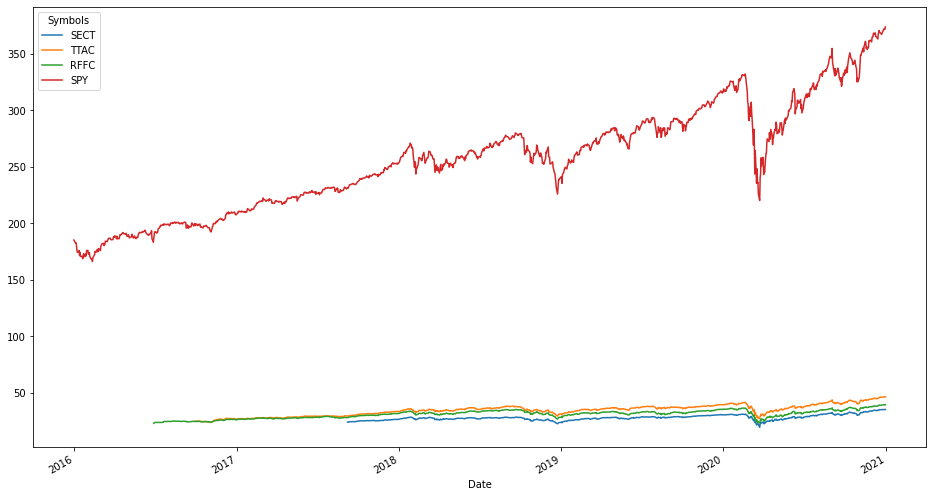

In [5]:
#5year
adj_close_5y.plot(figsize=(16,9))

### 4. If the data is not available for all the instruments for five years, trim the start of the data frame so that it all starts at the beginning of the first year where data is available for all of the instruments.
** The trimmed version of the data will be referred to as the "long period" data set throughout the rest of the lab.**

*Hint: You can manually inspect the data to find where there are no NaN values and create a new data frame that begins from 1 Jan of the year that follows that date.*

In [6]:
long_period = adj_close_5y.loc['2017-12-31':]
long_period.tail()

Symbols,SECT,TTAC,RFFC,SPY
Date,,,,
2020-12-24,34.971001,45.961700,39.046482,369.000000
2020-12-28,35.029999,46.110088,39.305187,372.170013
2020-12-29,34.840000,45.889000,39.018513,371.459991
2020-12-30,34.930000,46.160000,39.207298,371.989990
2020-12-31,35.049999,46.313999,39.305187,373.880005


### 5. Plot the long period data set and check that all of the lines cover the same data period

-> What is the start date for your long period data set?

    Start date = 2018-01-01
    
-> How many years of data does it cover?

    It covers 3 yrs of data

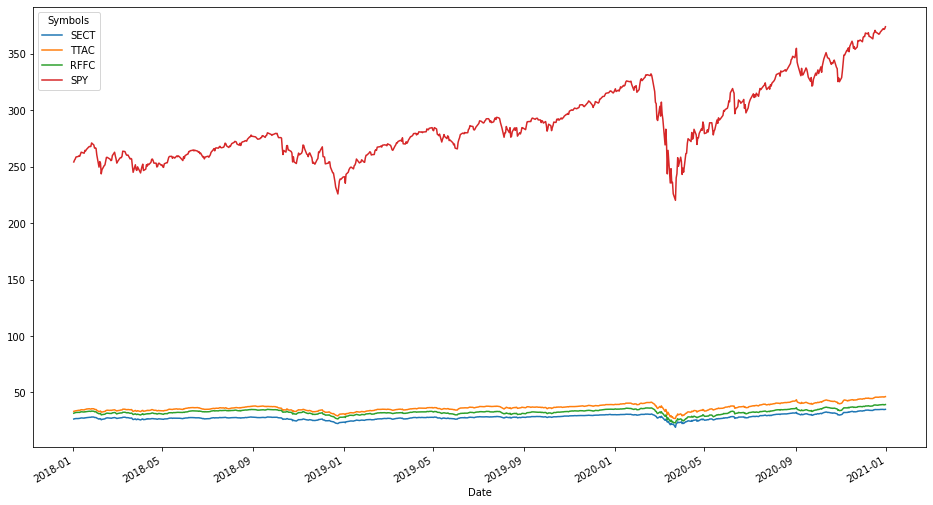

In [7]:
long_period.plot(figsize=(16,9))

### 6. Generate return series for 1 year and long period data sets. Plot them versus SPY and see how closely the returns of each fund compares to the benchmark 
*Hint: generate separate graphs for each fund vs the benchmark, not all on one graph.*

-> Which fund looks like it is tracking the closest to the benchmark for 1 year?
    
    TTAC, because the gap between the two lines is smaller

-> Which fund looks like it is tracking the benchmark the least for 1 year?

    RFFC because the gap between the two lines is larger

-> Which fund looks like it is tracking the closest to the benchmark for the long period?

    TTAC, because the gap between the two lines is smaller
    
-> Which fund looks like it is tracking the benchmark the least for the long period?

    RFFC because the gap between the two lines is larger

In [9]:
long_period

Symbols,SECT,TTAC,RFFC,SPY
Date,,,,
2018-01-02,26.482416,33.287266,31.623981,254.112717
2018-01-03,26.693127,33.485771,31.920782,255.719986
2018-01-04,26.783155,33.671497,32.115143,256.797821
2018-01-05,26.913418,33.771729,32.284607,258.509186
2018-01-08,26.898094,34.167751,32.409073,258.981873
...,...,...,...,...
2020-12-24,34.971001,45.961700,39.046482,369.000000
2020-12-28,35.029999,46.110088,39.305187,372.170013
2020-12-29,34.840000,45.889000,39.018513,371.459991


In [13]:
(1 + long_period.pct_change())

Symbols,SECT,TTAC,RFFC,SPY
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,1.007957,1.005963,1.009385,1.006325
2018-01-04,1.003373,1.005546,1.006089,1.004215
2018-01-05,1.004864,1.002977,1.005277,1.006664
2018-01-08,0.999431,1.011726,1.003855,1.001829
...,...,...,...,...
2020-12-24,1.003184,0.999848,1.001691,1.003890
2020-12-28,1.001687,1.003229,1.006626,1.008591
2020-12-29,0.994576,0.995205,0.992706,0.998092


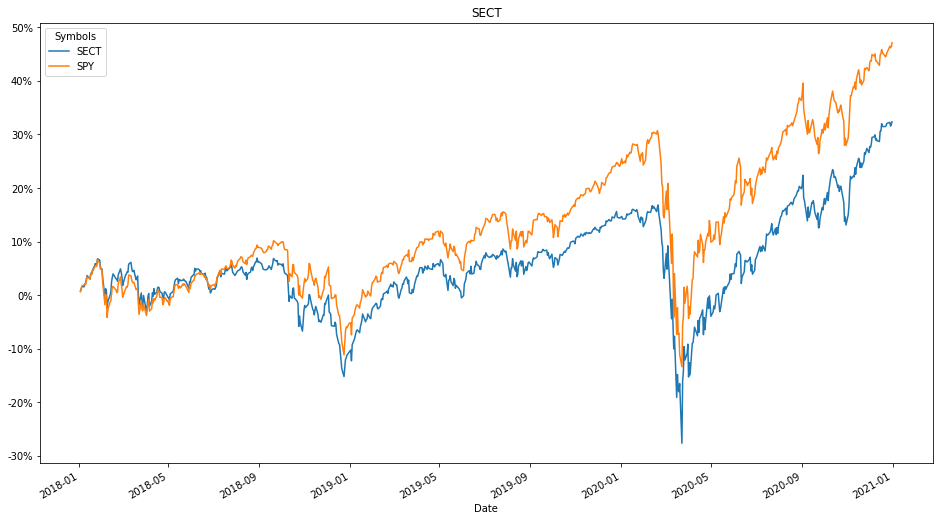

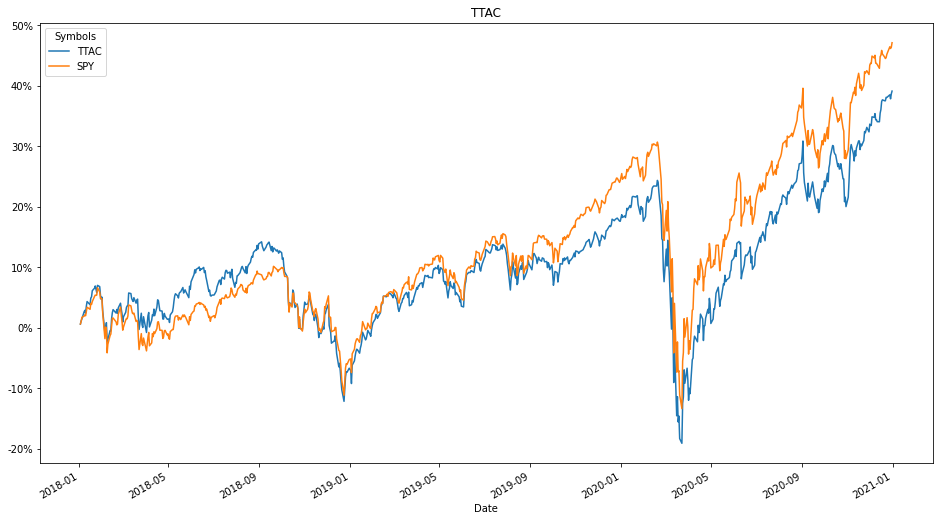

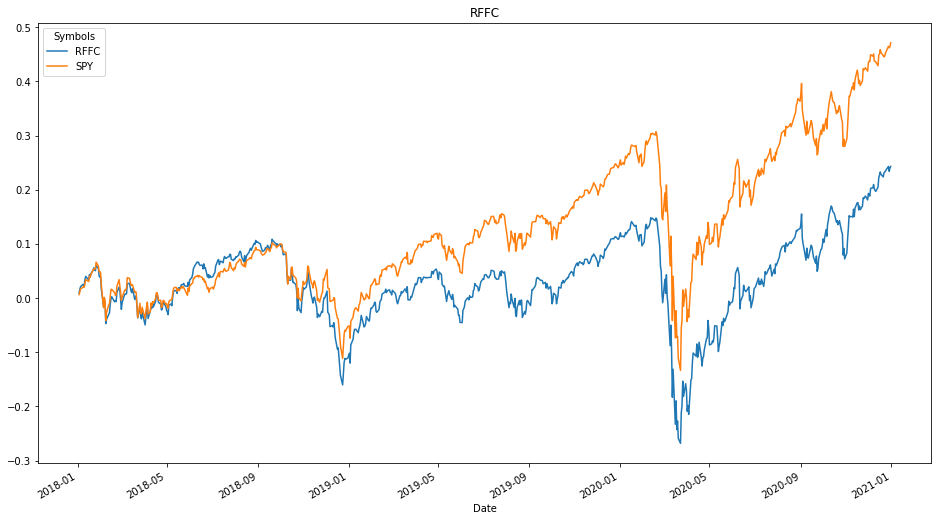

In [8]:
#Long period
long_period_ret = (1 + long_period.pct_change()).cumprod() - 1

sect_long_period_plot = long_period_ret.plot(y=["SECT", "SPY"], figsize=(16,9), title="SECT")
sect_long_period_plot.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

ttac_long_period_plot = long_period_ret.plot(y=["TTAC", "SPY"], figsize=(16,9), title="TTAC")
ttac_long_period_plot.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

rffc_long_period_plot = long_period_ret.plot(y=["RFFC", "SPY"], figsize=(16,9), title="RFFC")
ttac_long_period_plot.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

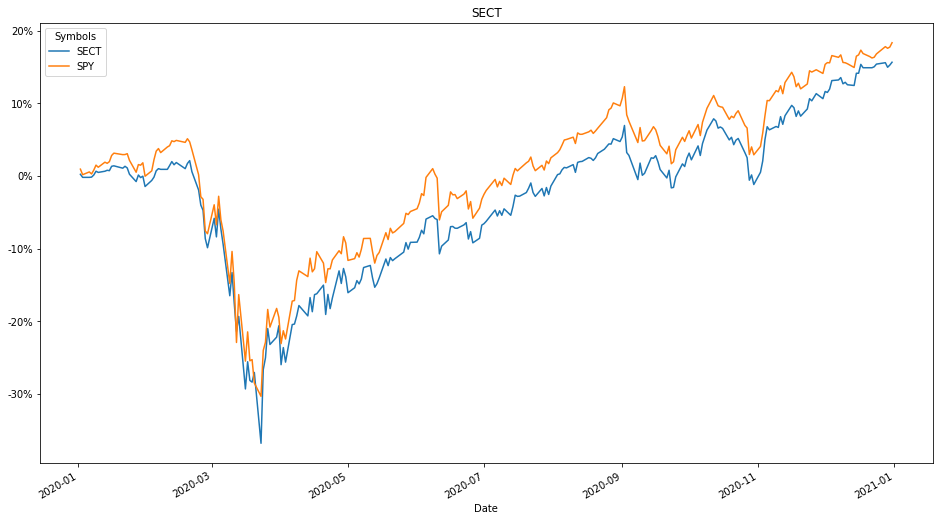

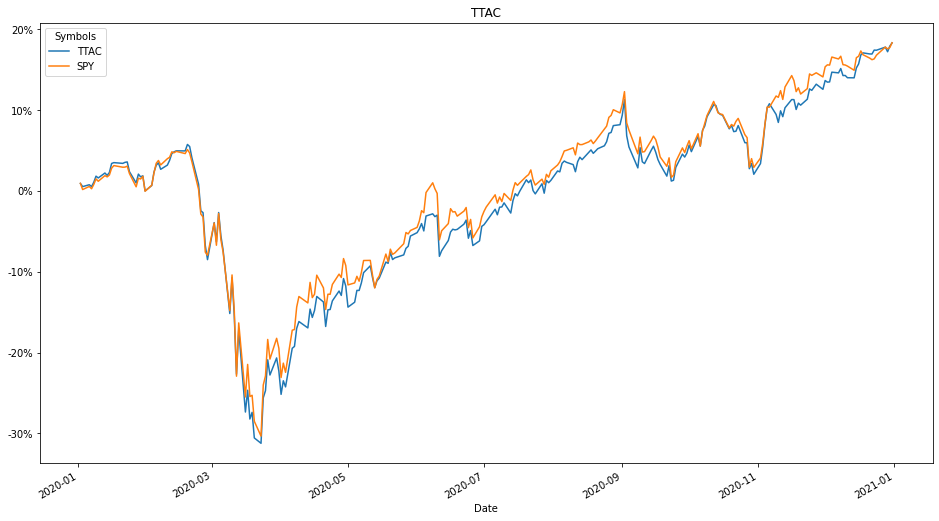

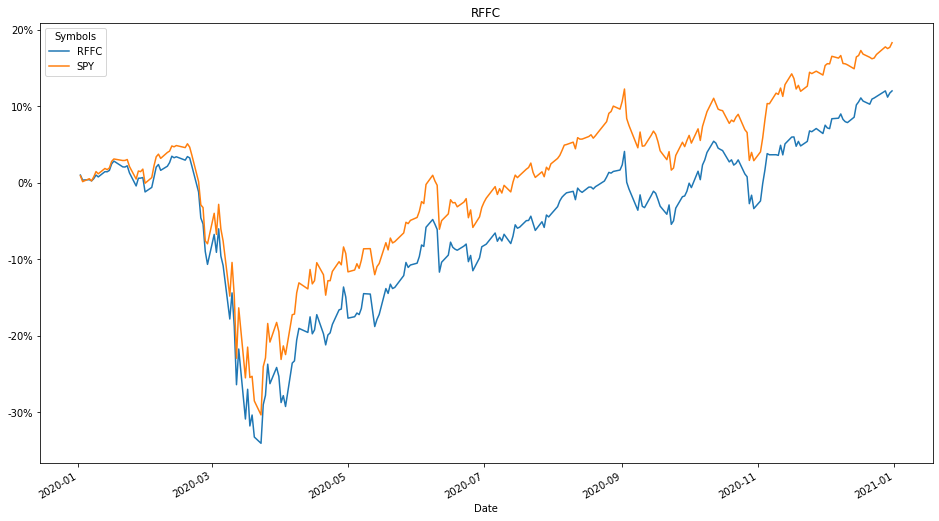

In [13]:
#1year
adj_close_1y_ret = (1 + adj_close_1y.pct_change()).cumprod() - 1

sect_1y_plot = adj_close_1y_ret.plot(y = ["SECT","SPY"], figsize=(16,9), title="SECT")
sect_1y_plot.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

ttac_1y_plot = adj_close_1y_ret.plot(y = ["TTAC","SPY"], figsize=(16,9), title="TTAC")
ttac_1y_plot.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

rffc_1y_plot = adj_close_1y_ret.plot(y = ["RFFC","SPY"], figsize=(16,9), title="RFFC")
rffc_1y_plot.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

### 7. Calculate annualised returns for the 1-year and long period data sets in percentage terms.
*Hint: remember that the last row in the return series is the total return for that period.*

-> What is the 1-year annualized return for 

    SECT:    0.156482

    TTAC:    0.183026

    RFFC:    0.120330

-> What is the long period annualized return for 

    SECT:    0.097935

    TTAC:    0.116378

    RFFC:    0.075172

In [14]:
#1-year annualized return
yr_annualized_ret = (1 + adj_close_1y_ret.iloc[-1]) - 1
yr_annualized_ret

Symbols
SECT    0.156482
TTAC    0.183026
RFFC    0.120330
SPY     0.183316
Name: 2020-12-31 00:00:00, dtype: float64

In [15]:
#long period annualized return
long_period_annualized_ret = (1 + long_period_ret.iloc[-1])**(1/3) - 1
long_period_annualized_ret

Symbols
SECT    0.097935
TTAC    0.116378
RFFC    0.075172
SPY     0.137370
Name: 2020-12-31 00:00:00, dtype: float64

### 8. Calculate the relative peformance of each of the funds over or under the SPY benchmark for the 1-year and long data set periods


In [16]:
#1-year relative performance
yr_relative_performance = yr_annualized_ret - yr_annualized_ret.SPY
display(yr_relative_performance)

#5r-year relative performance
long_period_relative_performance = long_period_annualized_ret - long_period_annualized_ret.SPY
display(long_period_relative_performance)

Symbols
SECT   -0.026834
TTAC   -0.000290
RFFC   -0.062986
SPY     0.000000
Name: 2020-12-31 00:00:00, dtype: float64

Symbols
SECT   -0.039435
TTAC   -0.020992
RFFC   -0.062199
SPY     0.000000
Name: 2020-12-31 00:00:00, dtype: float64

### 9. Using the return series, calculate the correlation of the funds versus the SPY benchmark for 1 year and use a scatter plot to visually compare the relationship between the returns of each fund and the benchmark 

-> What is the 1-year correlation for each fund vs SPY?

    SECT    0.992735
    TTAC    0.995679
    RFFC    0.977252
    SPY     1.000000

In [17]:
#correlation calcs
adj_close_1y_ret.corr()["SPY"]

Symbols
SECT    0.992735
TTAC    0.995679
RFFC    0.977252
SPY     1.000000
Name: SPY, dtype: float64

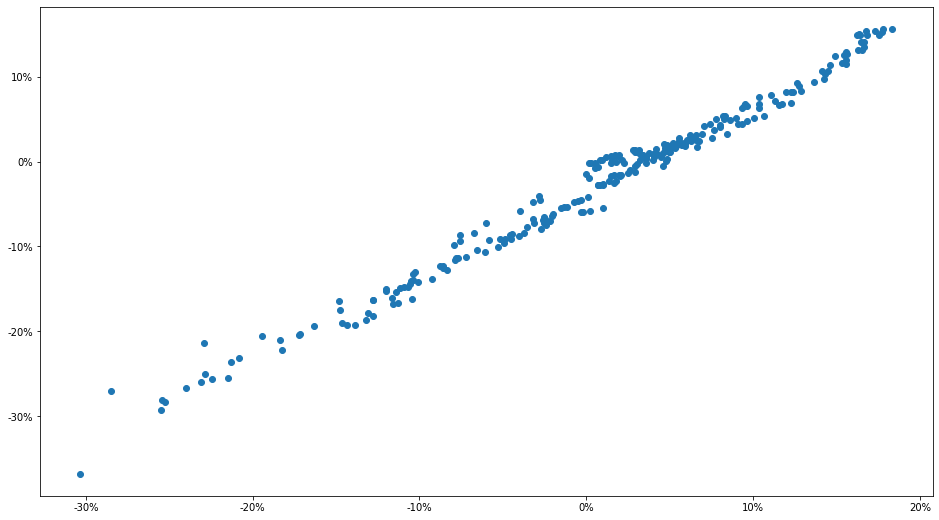

In [18]:
#scatter plot Fund1
fig2,ax2 = plt.subplots(figsize=(16,9))
ax2.scatter(adj_close_1y_ret["SPY"], adj_close_1y_ret["SECT"])
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax2.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

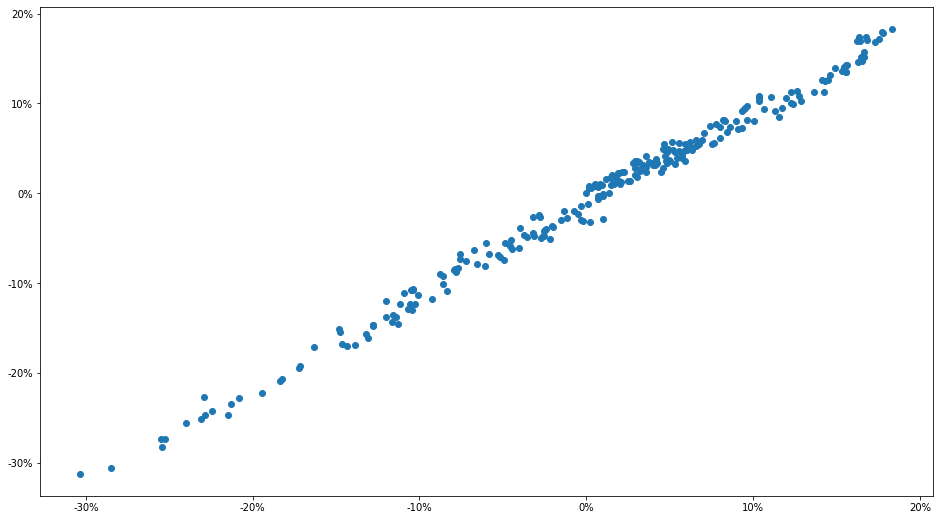

In [19]:
#scatter plot Fund2
fig3,ax3 = plt.subplots(figsize=(16,9))
ax3.scatter(adj_close_1y_ret["SPY"], adj_close_1y_ret["TTAC"])
ax3.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax3.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

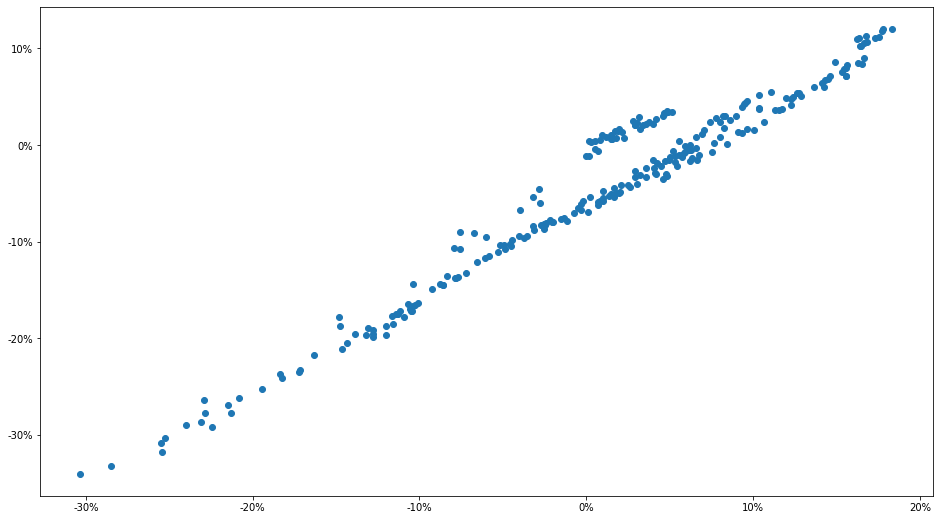

In [20]:
#scatter plot Fund3
fig4,ax4 = plt.subplots(figsize=(16,9))
ax4.scatter(adj_close_1y_ret["SPY"], adj_close_1y_ret["RFFC"])
ax4.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax4.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

### 10. Calculate the same type of correlation versus the SPY benchmark for the long period data set

-> What is the long period correlation for each fund vs SPY?

    SECT    0.924592
    TTAC    0.949416
    RFFC    0.766429
    SPY     1.000000

In [21]:
long_period_ret.corr()["SPY"]

Symbols
SECT    0.924592
TTAC    0.949416
RFFC    0.766429
SPY     1.000000
Name: SPY, dtype: float64

### 11. Final Analysis
Based on the 1-year data:

-> Which fund is the has the most active management?

    RFFC because it has the lowest correlation with SPY

-> Which fund is the least actively managed?

    TTAC because it has the higest correlation with SPY


-> Which fund(s) have annualized returns that beat the benchmark?

    None


Based on the long-period data:

-> Which fund is the has the most active management?

    RFFC because it has the lowest correlation with SPY

-> Which fund is the least actively managed?

    TTAC because it has the higest correlation with SPY

-> Which fund(s) have annualized returns that beat the benchmark?

    None

-> Are there any funds that you can recommend that are both actively managed and have returns that beat the benchmark?

    Based on long period return analysis, RFFC is more actively managed because its correlation coefficient with SPY is the smallest. This means that it follows the index the least. However, it doesn't beat the benchmark based on the annualized returns and its returns are worse than the other two funds.

-> If so, which are they and how strongly do you feel about recommending them based on the data and why?
    
    Based on the data, only RFFC is more actively managed but it has the lowest annualized return compared to the benchmark. Hence, I would not recommend any of these three funds.